### 월간 코드 챌린지 시즌2 > [2개 이하로 다른 비트](https://school.programmers.co.kr/learn/courses/30/lessons/77885)

1. 숫자를 입력받으면 bit 형식으로 변환  
2. 끝에서부터 0이 있다면 1을 추가하고, 그 숫자를 반환  
3. 0이 하나도 없다면 다음 비트의 숫자를 반환  

In [ ]:
num = 7

# 2비트 변환
binary = bin(num)[2:].zfill(2)
print(binary)

# 10진수 숫자로 변환
decimal = int(binary, 2)
print(decimal)

In [ ]:
def solution(numbers):
    answers = []
    for number in numbers :
        binary = bin(number)[2:]
        answer = str(binary)
        for i in range(len(binary), 0, -1):
            if binary[i-1] == '0':
                prefix = answer[:i-1] + '1'
                target = answer[i:]
                if '1' in target:
                    zero_idx = target.index('1')
                    target = target[:zero_idx] + '0' + target[zero_idx+1:]
                answer = prefix + target
                
                answers.append(int(answer, 2))
                break
        if answer == binary:
            answers.append(2 ** len(binary) - 2 ** (len(binary)-1) + int(answer,2))
    return answers        

In [ ]:
solution([2,7])

In [ ]:
solution([4321, 5324, 1111, 444, 666])

In [ ]:
bin(1112)[2:]

In [ ]:
bin(1111)[2:]

In [ ]:
bin(1115)[2:]

### 2022 KAKAO TECH INTERNSHIP > [두 큐 합 같게 만들기](https://school.programmers.co.kr/learn/courses/30/lessons/118667?language=python3)

1. 두 큐의 합 확인
- 두 큐의 합이 홀수면 return -1
2. 두 큐의 합이 짝수인 경우
- 하위 집합 중 그 합이 절반에 해당하는 경우가 존재하지 않으면 return -1
3. 하위 집합 중 일치하도록 처리

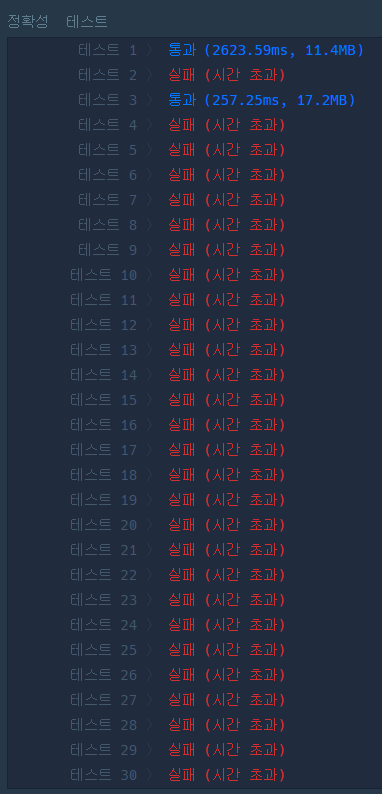

In [51]:
from itertools import combinations
from collections import deque

def solution(queue1, queue2):
    both = queue1 + queue2
    if sum(both) % 2 == 1:
        return -1
    
    half = sum(both) // 2
    halfs = []
    for r in range(1, len(both)+1):
        target = [sorted(list(x)) for x in combinations(both, r) if sum(x) == half]
        halfs = halfs+target if target not in halfs else halfs

    if not halfs:
        return -1
    
    queue = deque([(queue1, queue2, 0)])
    history = [queue1, queue2]
    while queue:
        queue1, queue2, cnt = queue.popleft()
        
        # case 1 : q1 → q2
        queue3 = queue1[1:]
        queue4 = queue2 + queue1[:1]
        if queue3 not in history and queue4 not in history:
            if sum(queue3) == half:
                print(f'answer1 :{queue3=}, {queue4=}')
                return cnt + 1
            queue.append((queue3, queue4, cnt+1))
            history = history + queue3 + queue4
        
        # case 2 : q2 → q1
        queue3 = queue1 + queue2[:1]
        queue4 = queue2[1:]
        if queue3 not in history and queue4 not in history:
            if sum(queue3) == half:
                print(f'answer2 :{queue3=}, {queue4=}')
                return cnt + 1
            queue.append((queue3, queue4, cnt+1))
            history = history + queue3 + queue4

In [201]:
from itertools import combinations
from collections import deque

def solution(queue1, queue2):
    both = queue1 + queue2
    if sum(both) % 2 == 1:
        return -1
    elif sum(queue1) == sum(queue2):
        return 0
    
    half = sum(both) // 2
    halfs = False
    for r in range(1, len(both)+1):
        target = [sorted(list(x)) for x in combinations(both, r) if sum(x) == half]
        if target:
            halfs = True
            break

    if not halfs:
        return -1
    
    queue1, queue2 = deque(queue1), deque(queue2)
    queue3, queue4 = queue1.copy(), queue2.copy() 
    queue = deque([(queue3, queue4, 0)])
    history = [list(queue3)]
    while queue:
        queue1, queue2, cnt = queue.popleft()
        
        # case 1 : q1 → q2
        queue2.append(queue1.popleft())
        queue3, queue4 = queue1.copy(), queue2.copy()
        if list(queue3) not in history:
            history.append(list(queue3))
            if sum(queue3) == half:
                return cnt + 1
            if len(queue3) > 1 and len(queue4) > 1:
                queue.append((queue3, queue4, cnt+1))
              
        queue1.insert(0, queue2.pop()) # 복원
        
        # case 2 : q2 → q1
        queue1.append(queue2.popleft())
        queue3, queue4 = queue1.copy(), queue2.copy()
        if list(queue3) not in history:
            history.append(list(queue3))
            if sum(queue3) == half:
                return cnt + 1
            if len(queue3) > 1 and len(queue4) > 1:
                queue.append((queue3, queue4, cnt+1))               
                
        print(queue)
        print(history)

In [202]:
queue1 = deque([1,2,3])
queue2 = deque([4,5,6])

queue2.append(queue1.popleft())
queue1.insert(0, queue2.pop()) # 복원

print(queue1, queue2)

deque([1, 2, 3]) deque([4, 5, 6])


In [203]:
queue1.copy()

deque([1, 2, 3])

In [204]:
target1 = deque([0,1])
target1.popleft()

0

In [205]:
target1 = deque([0])
target2 = deque([])
if target1 and target2:
    print("check")

In [206]:
len(target2)

0

In [207]:
queue1 = [3,2,7,2]
queue2 = [4,6,5,1]
solution(queue1, queue2)

deque([(deque([2, 7, 2]), deque([4, 6, 5, 1, 3]), 1), (deque([3, 2, 7, 2, 4]), deque([6, 5, 1]), 1)])
[[3, 2, 7, 2], [2, 7, 2], [3, 2, 7, 2, 4]]


2

In [208]:
queue1 = [1,2,1,2]
queue2 = [1,10,1,2]
solution(queue1, queue2)

deque([(deque([2, 1, 2]), deque([1, 10, 1, 2, 1]), 1), (deque([1, 2, 1, 2, 1]), deque([10, 1, 2]), 1)])
[[1, 2, 1, 2], [2, 1, 2], [1, 2, 1, 2, 1]]
deque([(deque([1, 2, 1, 2, 1]), deque([10, 1, 2]), 1), (deque([1, 2]), deque([1, 10, 1, 2, 1, 2]), 2), (deque([2, 1, 2, 1]), deque([10, 1, 2, 1]), 2)])
[[1, 2, 1, 2], [2, 1, 2], [1, 2, 1, 2, 1], [1, 2], [2, 1, 2, 1]]
deque([(deque([1, 2]), deque([1, 10, 1, 2, 1, 2]), 2), (deque([2, 1, 2, 1]), deque([10, 1, 2, 1]), 2), (deque([1, 2, 1, 2, 1, 10]), deque([1, 2]), 2)])
[[1, 2, 1, 2], [2, 1, 2], [1, 2, 1, 2, 1], [1, 2], [2, 1, 2, 1], [1, 2, 1, 2, 1, 10]]
deque([(deque([2, 1, 2, 1]), deque([10, 1, 2, 1]), 2), (deque([1, 2, 1, 2, 1, 10]), deque([1, 2]), 2), (deque([1, 2, 1]), deque([10, 1, 2, 1, 2]), 3)])
[[1, 2, 1, 2], [2, 1, 2], [1, 2, 1, 2, 1], [1, 2], [2, 1, 2, 1], [1, 2, 1, 2, 1, 10], [2], [1, 2, 1]]
deque([(deque([1, 2, 1, 2, 1, 10]), deque([1, 2]), 2), (deque([1, 2, 1]), deque([10, 1, 2, 1, 2]), 3), (deque([2, 1, 2, 1, 10]), deque([1, 2, 1]

7